# Supply Chain Greenhouse Gas Emission Factors

## Import

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('scd.csv')

In [4]:
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0


In [5]:
df.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,1016.000000,1016.00000,1016.000000,1016.000000
mean,424917.376969,0.35787,0.028172,0.386014
std,164942.113495,0.55562,0.040568,0.569845
min,111110.000000,0.01300,0.000000,0.013000
25%,325588.250000,0.12300,0.000000,0.128750
50%,423700.000000,0.18700,0.000000,0.208000
75%,532111.250000,0.40150,0.049000,0.448250
max,813990.000000,10.98900,0.270000,10.989000


In [6]:
df.columns.tolist()

['2017 NAICS Code',
 '2017 NAICS Title',
 'GHG',
 'Unit',
 'Supply Chain Emission Factors without Margins',
 'Margins of Supply Chain Emission Factors',
 'Supply Chain Emission Factors with Margins',
 'Reference USEEIO Code']

No null values

## Visualisation

### Boxplots

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
useful_cols = ['Supply Chain Emission Factors without Margins',
               'Margins of Supply Chain Emission Factors',
               'Supply Chain Emission Factors with Margins']

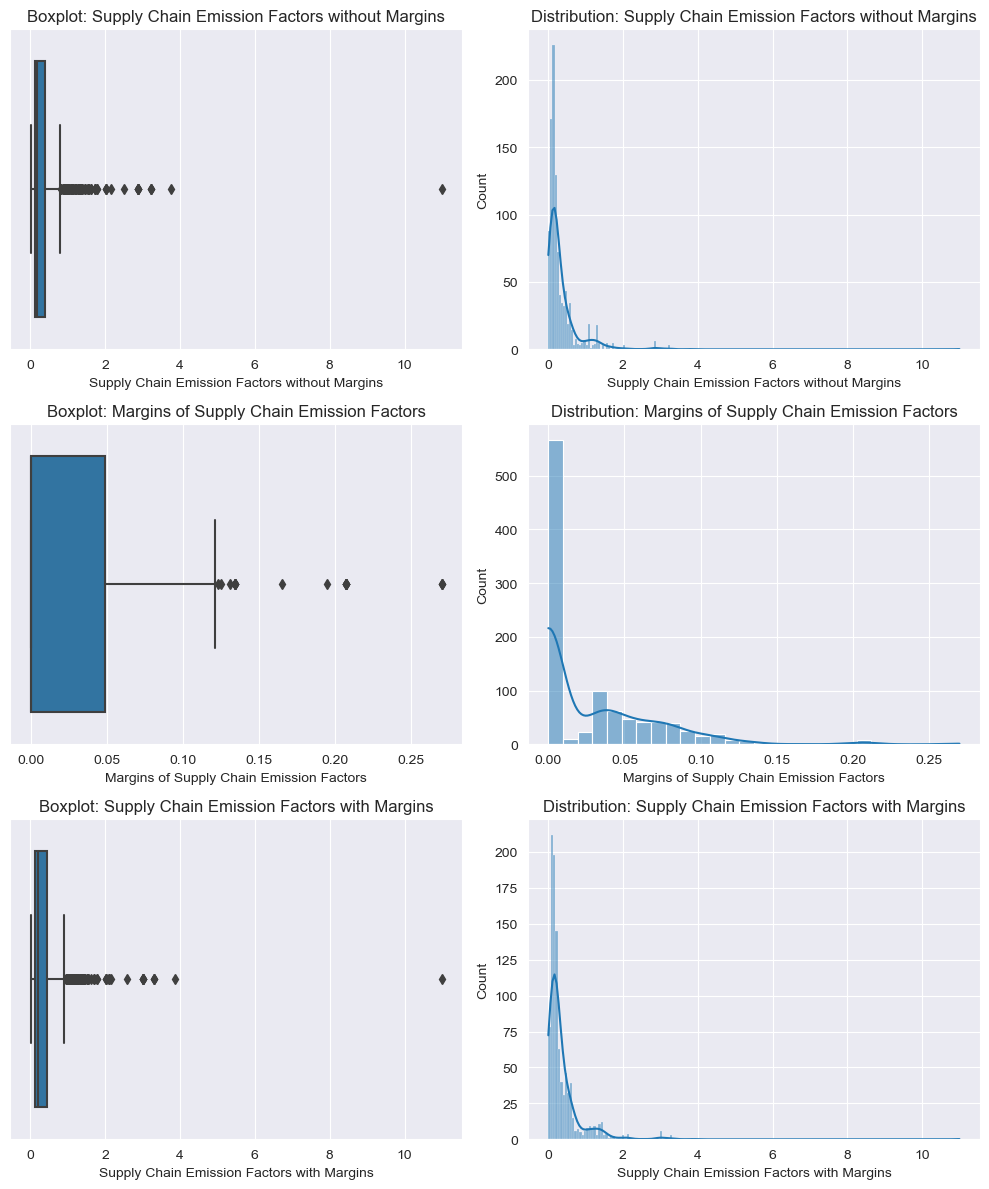

In [9]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

for i, column in enumerate(useful_cols):
    # Create a boxplot
    sns.boxplot(x=df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot: {column}')

    # Create a distribution plot (KDE)
    sns.histplot(df[column], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution: {column}')

plt.tight_layout()

plt.show()

Left skewed

### Transformation

#### Logarithmic

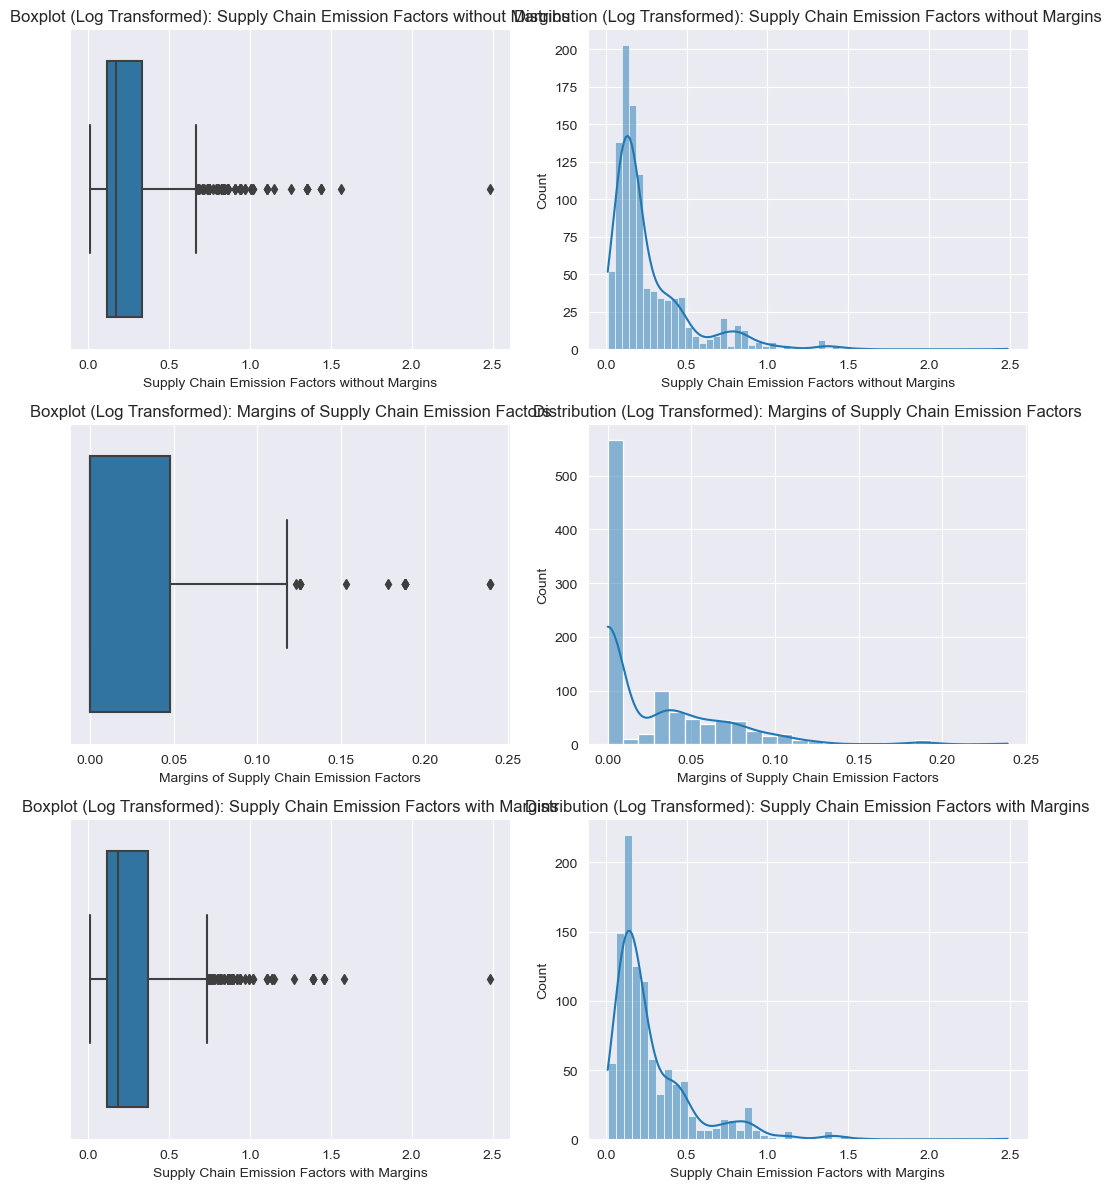

In [10]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

# Loop through each column and create boxplots and distribution plots after log transformation
for i, column in enumerate(useful_cols):
    # Apply log transformation to the data
    log_transformed_data = np.log1p(df[column])

    # Create a boxplot
    sns.boxplot(x=log_transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot (Log Transformed): {column}')

    # Create a distribution plot (KDE) for the log-transformed data
    sns.histplot(log_transformed_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution (Log Transformed): {column}')

plt.tight_layout()

plt.show()

Still quite skewed

#### Sqrt Transform

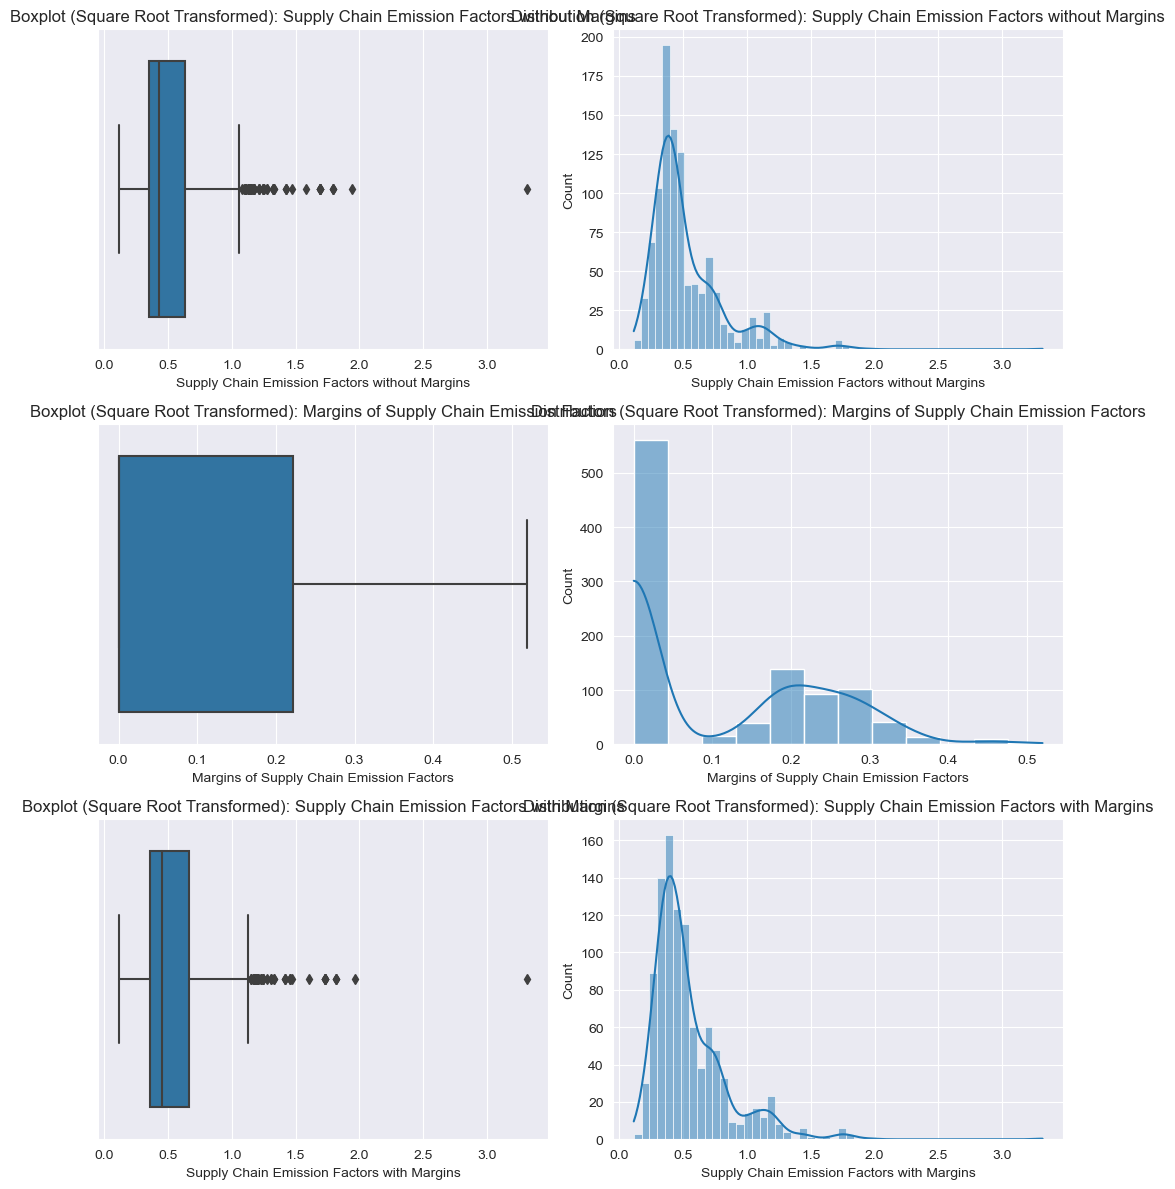

In [11]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

# Loop through each column and create boxplots and distribution plots after the transformation
for i, column in enumerate(useful_cols):
    # Apply a square root transformation to the data
    sqrt_transformed_data = np.sqrt(df[column])

    # Create a boxplot
    sns.boxplot(x=sqrt_transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot (Square Root Transformed): {column}')

    # Create a distribution plot (KDE) for the transformed data
    sns.histplot(sqrt_transformed_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution (Square Root Transformed): {column}')

plt.tight_layout()

plt.show()

#### Box-cox transform

In [12]:
from scipy.stats import boxcox

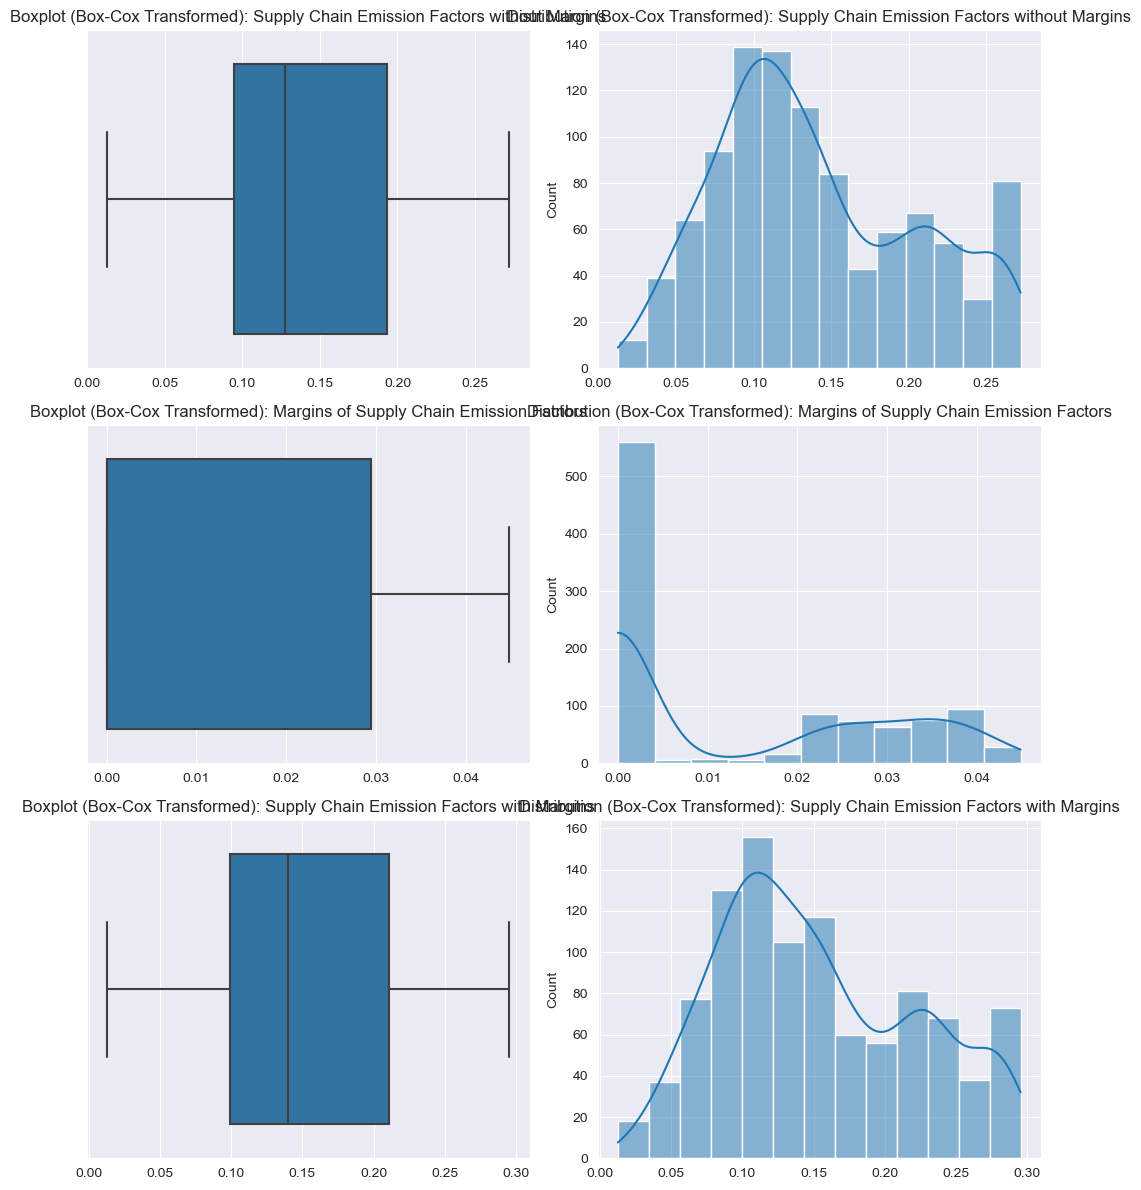

In [13]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

# Loop through each column and create boxplots and distribution plots after Box-Cox transformation
for i, column in enumerate(useful_cols):
    # Apply Box-Cox transformation to the data
    transformed_data, _ = boxcox(df[column] + 1)  # Adding 1 to handle zero values

    # Create a boxplot
    sns.boxplot(x=transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot (Box-Cox Transformed): {column}')

    # Create a distribution plot (KDE) for the transformed data
    sns.histplot(transformed_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution (Box-Cox Transformed): {column}')

plt.tight_layout()

plt.show()

#### square root and logarithm

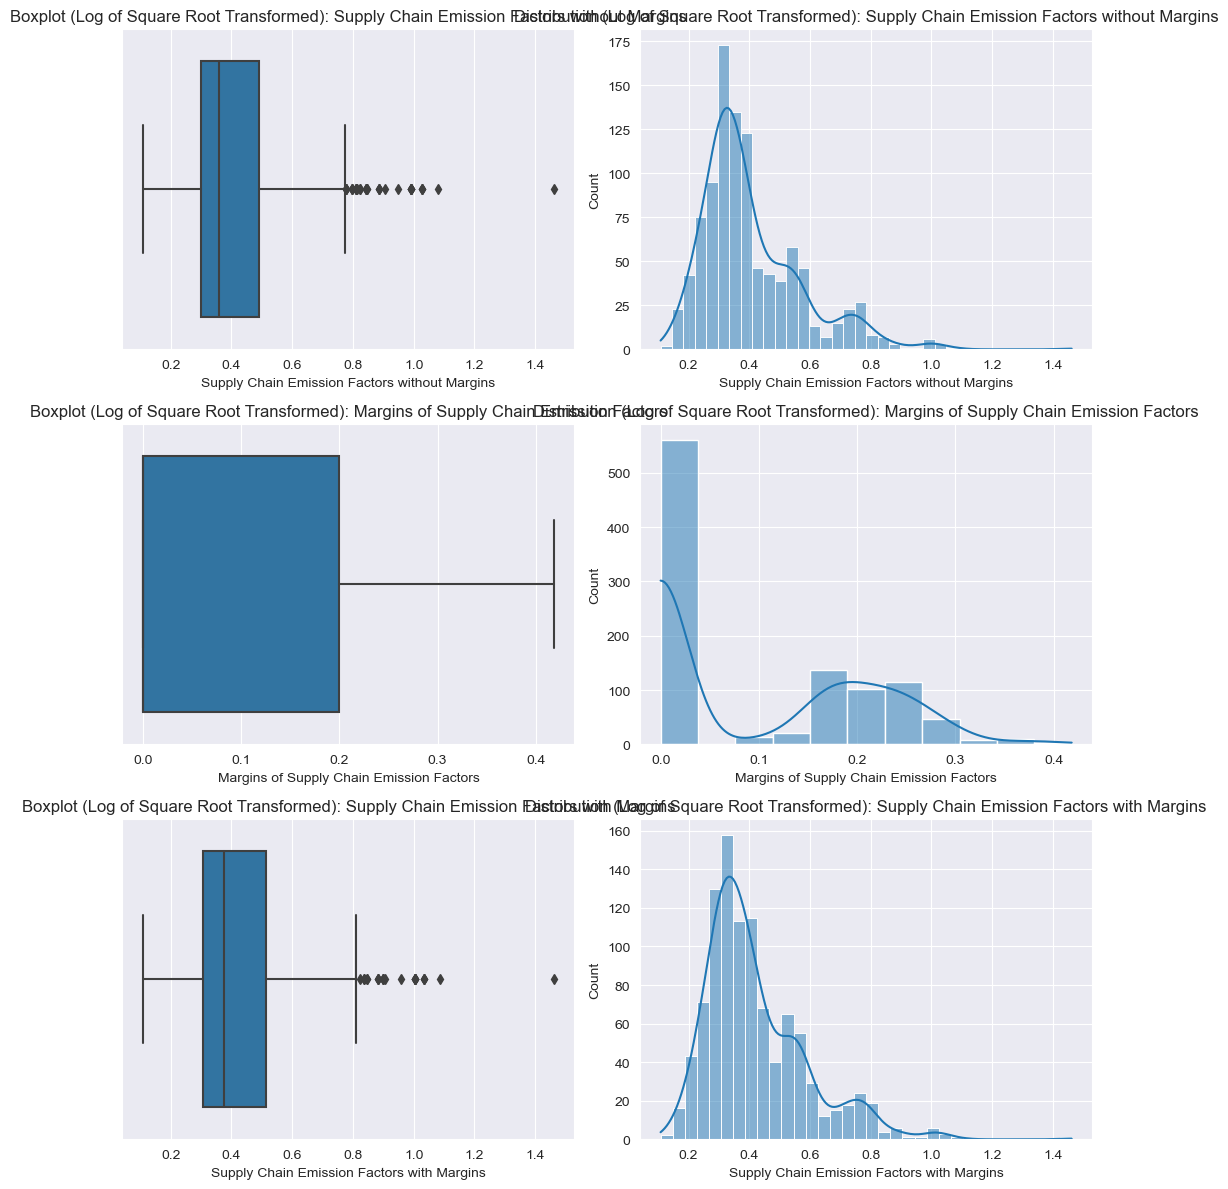

In [14]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

# Loop through each column and create boxplots and distribution plots after the transformation
for i, column in enumerate(useful_cols):
    # Apply the logarithm of the square root transformation to the data
    log_sqrt_transformed_data = np.log1p(np.sqrt(df[column]))

    # Create a boxplot
    sns.boxplot(x=log_sqrt_transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot (Log of Square Root Transformed): {column}')

    # Create a distribution plot (KDE) for the transformed data
    sns.histplot(log_sqrt_transformed_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution (Log of Square Root Transformed): {column}')

plt.tight_layout()

plt.show()

#### Exponential Transformation (Square Root)

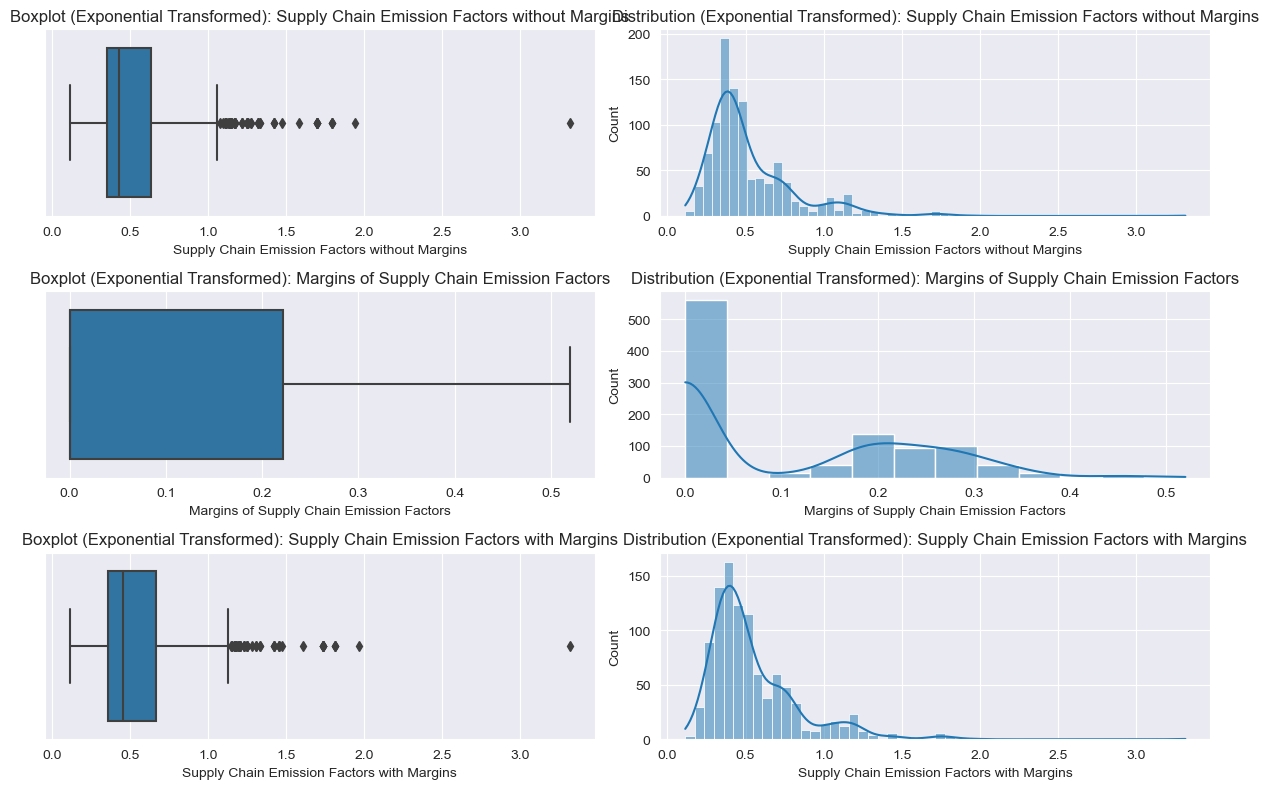

In [15]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(12, 8))

# Loop through each column and create plots with the exponential (square root) transformation
for i, column in enumerate(useful_cols):
    data = df[column]

    # Exponential Transformation (Square Root)
    sqrt_transformed_data = np.power(data, 0.5)
    sns.boxplot(x=sqrt_transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot (Exponential Transformed): {column}')
    sns.histplot(sqrt_transformed_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution (Exponential Transformed): {column}')

plt.tight_layout()

plt.show()

#### Inverse Transformation

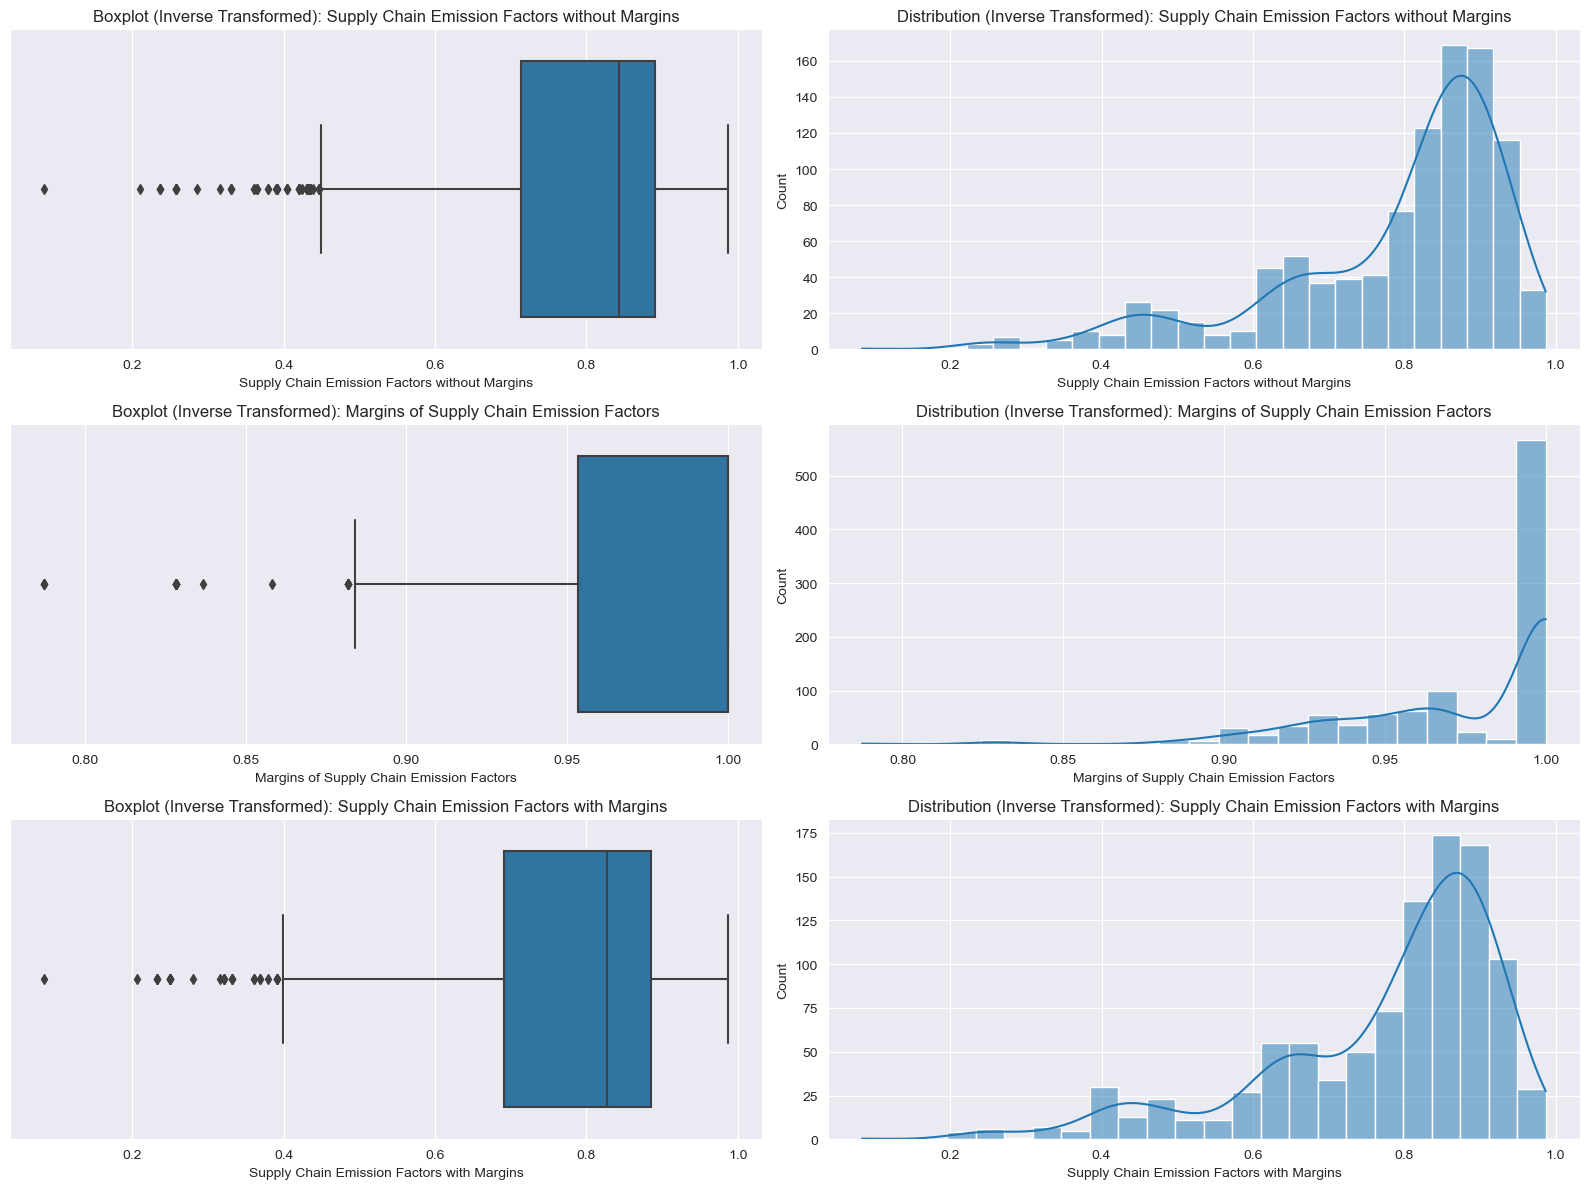

In [16]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(16, 12))

# Loop through each column and create plots after different transformations
for i, column in enumerate(useful_cols):
    data = df[column]

    # Inverse Transformation
    inv_transformed_data = 1 / (data + 1)
    sns.boxplot(x=inv_transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot (Inverse Transformed): {column}')
    sns.histplot(inv_transformed_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution (Inverse Transformed): {column}')

plt.tight_layout()

plt.show()

## Cleaning

In [17]:
df.isna().sum()

2017 NAICS Code                                  0
2017 NAICS Title                                 0
GHG                                              0
Unit                                             0
Supply Chain Emission Factors without Margins    0
Margins of Supply Chain Emission Factors         0
Supply Chain Emission Factors with Margins       0
Reference USEEIO Code                            0
dtype: int64

In [18]:
from scipy import stats

In [19]:
# Loop through each column and apply the Box-Cox transformation
for column in useful_cols:
    transformed_data, _ = stats.boxcox(df[column] + 1)  # Adding 1 to handle zero values
    df[column] = transformed_data

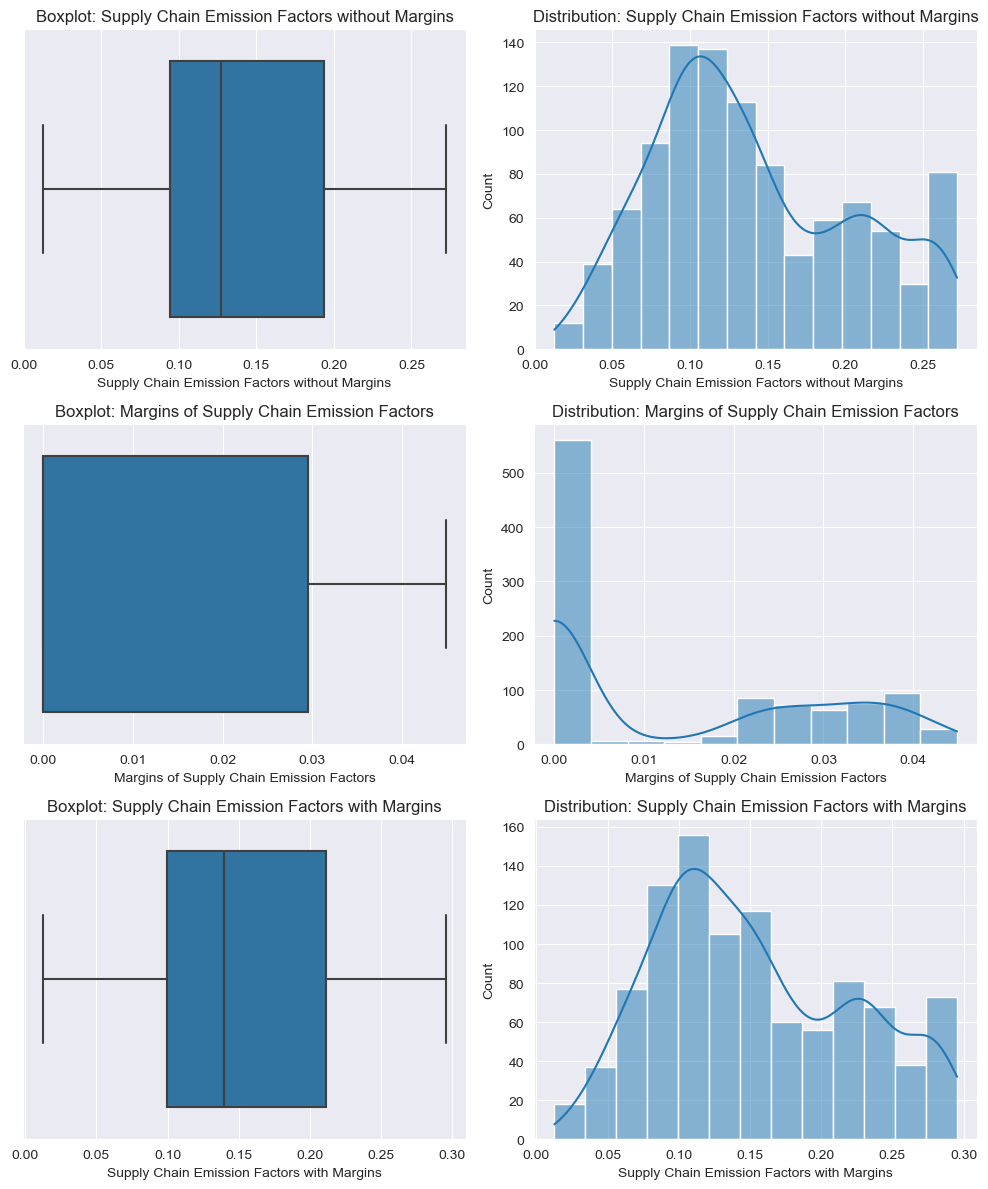

In [20]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

for i, column in enumerate(useful_cols):
    # Create a boxplot
    sns.boxplot(x=df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot: {column}')

    # Create a distribution plot (KDE)
    sns.histplot(df[column], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution: {column}')

plt.tight_layout()

plt.show()

#### IQR

In [21]:
for column in useful_cols:
    # Calculate the IQR for the column
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    # Apply the IQR transformation to the column's data
    transformed_data = (df[column] - Q1) / IQR
    df[column] = transformed_data

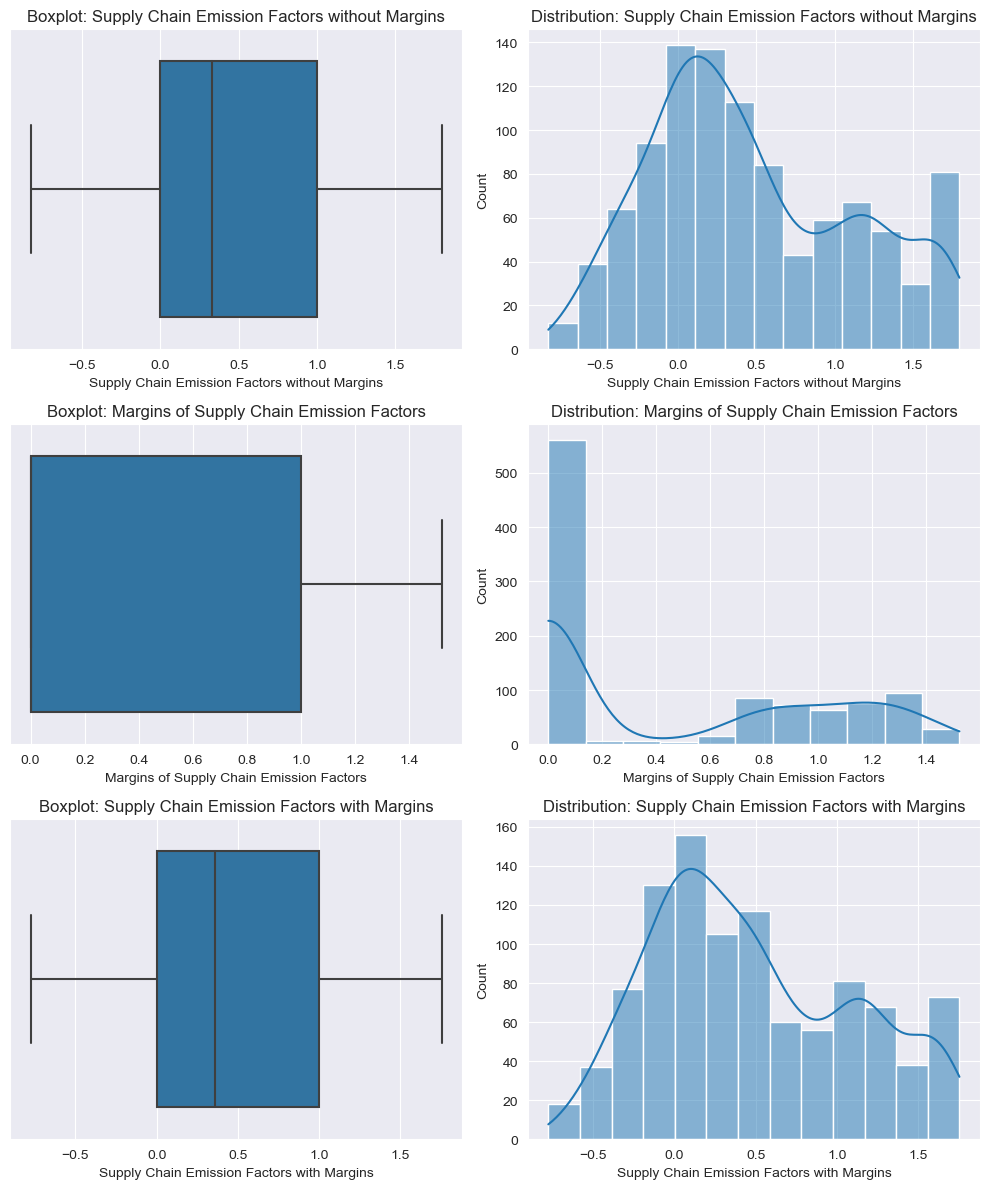

In [22]:
fig, axes = plt.subplots(nrows=len(useful_cols), ncols=2, figsize=(10, 12))

for i, column in enumerate(useful_cols):
    # Create a boxplot
    sns.boxplot(x=df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot: {column}')

    # Create a distribution plot (KDE)
    sns.histplot(df[column], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution: {column}')

plt.tight_layout()

plt.show()